# WeatherPy

## Observable Trends
* Between temperature and latitude there is a U-shaped distribution, suggesting that temperature rises and drops depending on latitude. Max temperature is highest near the equator.
* For southern and northern hemispheres, there are opposing correlations between latitude and max temperature. For example, there is a negative correlation between temperature and latitude in the northern hemisphere, while there is a positive correlation between temperature and latitude in the southern hemisphere.
* In the northern hemisphere, wind speed clusters more noticably towards the bottom than in the southern hemipshere. There are less discernable patterns in wind speed in the southern hemisphere. However, both linear regression lines fall between 5-10 MPH suggesting similar wind speeds in both hemispheres.
* Humidity tends to cluster in the upper region of the scatter plot for both southern and northern hemispheres. Both linear regression lines stay between 60-80% humidity.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import os

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
os.makedirs(os.path.join('output_data'),exist_ok=True)
output_data_file = os.path.join("output_data","cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# starter url and create empty lists
units= "imperial"
url = f"http://api.openweathermap.org/data/2.5/weather?&units={units}&APPID=" + weather_api_key 
city_aggregate = []
city_list = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
datetime = []
counter = 1

# print headers
print("Beginning Data Retrieval     ")
print("-----------------------------")


#loop through city data and retrieve requested information
#try/except for cities that cannot be retrieived
for city in cities:
    try:
        city_url = url + "&q=" + city
        print(f'Processing # {counter}, {city}')
        city_response = requests.get(city_url).json()
        city_latitude = city_response['coord']['lat']
        city_longitude = city_response['coord']['lon']
        city_max_temp = city_response['main']['temp_max']
        city_humidity = city_response['main']['humidity']
        city_cloudiness = city_response['clouds']['all']
        city_wind_speed = city_response['wind']['speed']
        city_country = city_response['sys']['country']
        city_datetime = city_response["dt"]
        #append city aggregate data
        city_aggregate.append({"city":city,
                      "Latitude":city_latitude,
                      "Longitude":city_longitude,
                      "Max Temp":city_max_temp,
                      "Humidity":city_humidity,
                      "Cloudiness":city_cloudiness,
                      "Wind Speed":city_wind_speed,
                      "Country":country,
                      "Date":datetime,
                      })
        #append city list
        city_list.append(city)
        #append latitude data
        latitude.append(city_latitude)
        #append longitude data
        longitude.append(city_longitude)
        #append max temperature data
        max_temp.append(city_max_temp)
        #append humidity data
        humidity.append(city_humidity)
        #append cloudiness data
        cloudiness.append(city_cloudiness)
        #append wind speed data
        wind_speed.append(city_wind_speed)
        #append country data
        country.append(city_country)
        #append date
        datetime.append(city_datetime)
    except:
        print("City not found, skip")
        pass
    counter += 1
# data retrieval completed
print("Data Retrieval Complete  ")

Beginning Data Retrieval     
-----------------------------
Processing # 1, provideniya
Processing # 2, chokurdakh
Processing # 3, sao joao da barra
Processing # 4, vaitupu
City not found, skip
Processing # 5, bowen
Processing # 6, punta arenas
Processing # 7, san patricio
Processing # 8, puerto cabezas
Processing # 9, sao filipe
Processing # 10, brooks
Processing # 11, ballina
Processing # 12, arraial do cabo
Processing # 13, povrly
Processing # 14, east london
Processing # 15, kodiak
Processing # 16, tuktoyaktuk
Processing # 17, worpswede
Processing # 18, moncton
Processing # 19, bambous virieux
Processing # 20, hithadhoo
Processing # 21, butaritari
Processing # 22, upernavik
Processing # 23, ancud
Processing # 24, dikson
Processing # 25, tabialan
City not found, skip
Processing # 26, bluff
Processing # 27, beringovskiy
Processing # 28, periceiu
Processing # 29, kapaa
Processing # 30, kharovsk
Processing # 31, svetlogorsk
Processing # 32, paita
Processing # 33, rikitea
Processing # 3

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame({
     'city':city_list,
     'cloudiness':cloudiness,
     'humidity':humidity,
     'latitude':latitude,
     'longitude':longitude,
     'max_temperature':max_temp,
     'wind_speed':wind_speed,
     'country':country,
     'datetime': datetime,
     })
weather_df.head()

,city,cloudiness,humidity,latitude,longitude,max_temperature,wind_speed,country,datetime
0,provideniya,90,81,64.38,-173.30,50.00,11.18,RU,1595302095
1,chokurdakh,55,31,70.63,147.92,83.53,14.41,RU,1595302300
2,sao joao da barra,0,90,-21.64,-41.05,70.48,10.20,BR,1595302300
3,bowen,98,46,-20.02,148.23,73.40,12.75,AU,1595302300
4,punta arenas,3,92,-53.15,-70.92,30.20,6.93,CL,1595302300


In [5]:
weather_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#create df that locates humidity values above 100
humidity_above_100_df = weather_df.loc[weather_df["humidity"] > 100]

In [7]:
#if zero, there are no humidity values above 100
print(len(humidity_above_100_df))

0


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

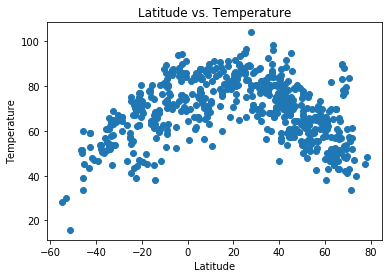

In [8]:
plt.scatter(weather_df["latitude"],weather_df["max_temperature"] )
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs. Temperature")
plt.savefig('output_data/latvtemp.png')
plt.show()

## Latitude vs. Humidity Plot

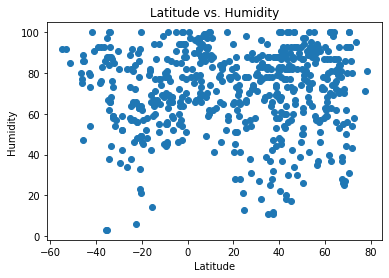

In [9]:
plt.scatter(weather_df["latitude"],weather_df["humidity"] )
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")
plt.savefig('output_data/latvhumidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

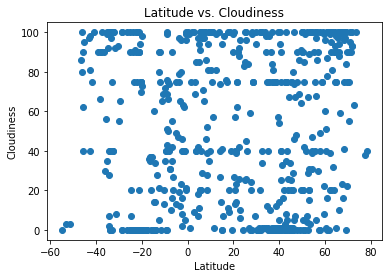

In [10]:
plt.scatter(weather_df["latitude"],weather_df["cloudiness"] )
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")
plt.savefig('output_data/latvcloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

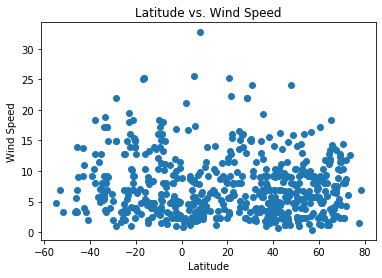

In [11]:
plt.scatter(weather_df["latitude"],weather_df["wind_speed"] )
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")
plt.savefig('output_data/latvwindspeed.png')
plt.show()

## Linear Regression

In [12]:
# Create Northern and Southern Hemisphere DataFrames
#northern
northern_df = weather_df.loc[weather_df["latitude"] >= 0.0]
northern_df.reset_index(inplace=True)

#southern
southern_df = weather_df.loc[weather_df["latitude"] < 0.0]
southern_df.reset_index(inplace=True)

In [13]:
northern_df.head()

,index,city,cloudiness,humidity,latitude,longitude,max_temperature,wind_speed,country,datetime
0,0,provideniya,90,81,64.38,-173.30,50.00,11.18,RU,1595302095
1,1,chokurdakh,55,31,70.63,147.92,83.53,14.41,RU,1595302300
2,5,san patricio,0,82,19.22,-104.70,79.48,8.37,MX,1595302300
3,6,puerto cabezas,74,84,14.04,-83.39,78.73,6.44,NI,1595302300
4,7,sao filipe,41,82,14.90,-24.50,75.70,9.84,CV,1595302300


In [14]:
southern_df.head()

,index,city,cloudiness,humidity,latitude,longitude,max_temperature,wind_speed,country,datetime
0,2,sao joao da barra,0,90,-21.64,-41.05,70.48,10.20,BR,1595302300
1,3,bowen,98,46,-20.02,148.23,73.40,12.75,AU,1595302300
2,4,punta arenas,3,92,-53.15,-70.92,30.20,6.93,CL,1595302300
3,9,ballina,100,52,-28.87,153.57,66.20,14.99,AU,1595302301
4,10,arraial do cabo,0,84,-22.97,-42.03,70.27,17.96,BR,1595302301


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

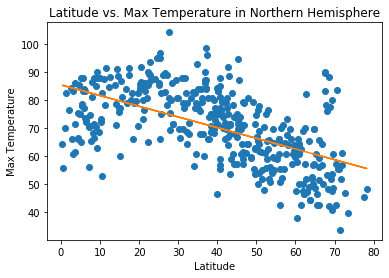

In [15]:
#lat vs. max temp for northern hempisphere
north_temp_lat_x = northern_df["latitude"]
north_temp_lat_y = northern_df["max_temperature"]
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_temp_lat_x, north_temp_lat_y)
plt.plot(north_temp_lat_x, north_temp_lat_y, 'o')

m, b = np.polyfit(north_temp_lat_x, north_temp_lat_y, 1)

plt.plot(north_temp_lat_x, m*north_temp_lat_x + b)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Latitude vs. Max Temperature in Northern Hemisphere")
plt.savefig('output_data/latvtempnorth.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

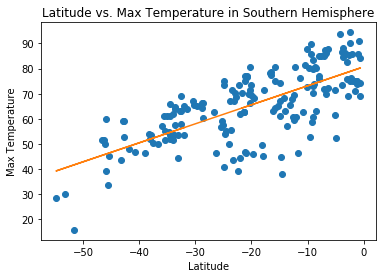

In [16]:
#lat vs. max temp for southern hemisphere
south_temp_lat_x = southern_df["latitude"]
south_temp_lat_y = southern_df["max_temperature"]
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_temp_lat_x, south_temp_lat_y)
plt.plot(south_temp_lat_x, south_temp_lat_y, 'o')

m, b = np.polyfit(south_temp_lat_x, south_temp_lat_y, 1)

plt.plot(south_temp_lat_x, m*south_temp_lat_x + b)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Latitude vs. Max Temperature in Southern Hemisphere")
plt.savefig('output_data/latvtempsouth.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

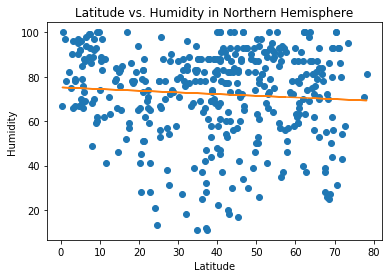

In [17]:
#lat vs. humidity for northern hempisphere
north_humidity_lat_x = northern_df["latitude"]
north_humidity_lat_y = northern_df["humidity"]
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_humidity_lat_x, north_humidity_lat_y)
plt.plot(north_humidity_lat_x, north_humidity_lat_y, 'o')

m, b = np.polyfit(north_humidity_lat_x, north_humidity_lat_y, 1)

plt.plot(north_humidity_lat_x, m*north_humidity_lat_x + b)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity in Northern Hemisphere")
plt.savefig('output_data/latvhumiditynorth.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

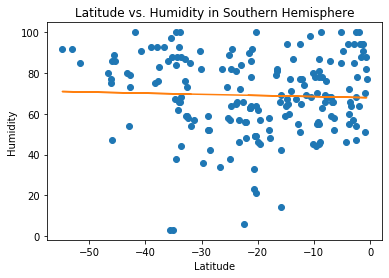

In [18]:
#lat vs. humidity for southern hempisphere
south_humidity_lat_x = southern_df["latitude"]
south_humidity_lat_y = southern_df["humidity"]
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_humidity_lat_x, south_humidity_lat_y)
plt.plot(south_humidity_lat_x, south_humidity_lat_y, 'o')

m, b = np.polyfit(south_humidity_lat_x, south_humidity_lat_y, 1)

plt.plot(south_humidity_lat_x, m*south_humidity_lat_x + b)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity in Southern Hemisphere")
plt.savefig('output_data/latvhumiditysouth.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

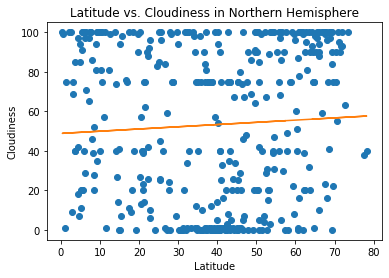

In [19]:
#lat vs. cloudiness for northern hempisphere
north_cloudiness_lat_x = northern_df["latitude"]
north_cloudiness_lat_y = northern_df["cloudiness"]
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cloudiness_lat_x, north_cloudiness_lat_y)
plt.plot(north_cloudiness_lat_x, north_cloudiness_lat_y, 'o')

m, b = np.polyfit(north_cloudiness_lat_x, north_cloudiness_lat_y, 1)

plt.plot(north_humidity_lat_x, m*north_humidity_lat_x + b)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness in Northern Hemisphere")
plt.savefig('output_data/latvcloudinessnorth.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

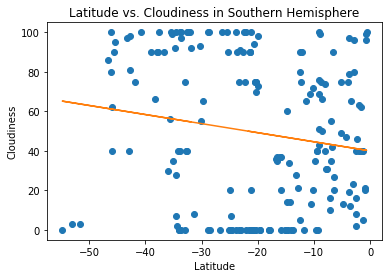

In [23]:
#lat vs. cloudiness for southern hempisphere
south_cloudiness_lat_x = southern_df["latitude"]
south_cloudiness_lat_y = southern_df["cloudiness"]
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cloudiness_lat_x, south_cloudiness_lat_y)
plt.plot(south_cloudiness_lat_x, south_cloudiness_lat_y, 'o')

m, b = np.polyfit(south_cloudiness_lat_x, south_cloudiness_lat_y, 1)

plt.plot(south_humidity_lat_x, m*south_humidity_lat_x + b)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness in Southern Hemisphere")
plt.savefig('output_data/latvcloudinesssouth.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

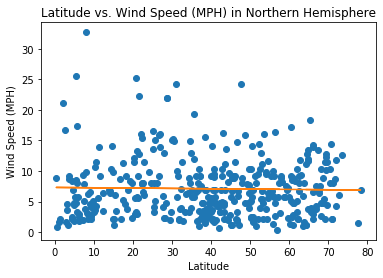

In [21]:
#lat vs. wind speed(mph) for northern hempisphere
north_wind_speed_lat_x = northern_df["latitude"]
north_wind_speed_lat_y = northern_df["wind_speed"]
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_wind_speed_lat_x, north_wind_speed_lat_y)
plt.plot(north_wind_speed_lat_x, north_wind_speed_lat_y, 'o')

m, b = np.polyfit(north_wind_speed_lat_x, north_wind_speed_lat_y, 1)

plt.plot(north_wind_speed_lat_x, m*north_wind_speed_lat_x + b)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.title("Latitude vs. Wind Speed (MPH) in Northern Hemisphere")
plt.savefig('output_data/latvwindspeednorth.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

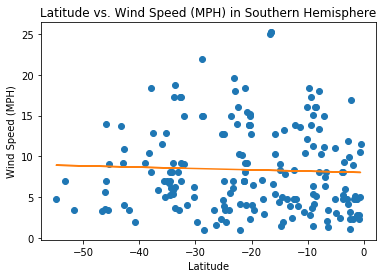

In [22]:
#lat vs. wind speed(mph) for southern hempisphere
south_wind_speed_lat_x = southern_df["latitude"]
south_wind_speed_lat_y = southern_df["wind_speed"]
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_wind_speed_lat_x, south_wind_speed_lat_y)
plt.plot(south_wind_speed_lat_x, south_wind_speed_lat_y, 'o')

m, b = np.polyfit(south_wind_speed_lat_x, south_wind_speed_lat_y, 1)

plt.plot(south_wind_speed_lat_x, m*south_wind_speed_lat_x + b)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.title("Latitude vs. Wind Speed (MPH) in Southern Hemisphere")
plt.savefig('output_data/latvwindspeedsouth.png')
plt.show()